# Predicting will passenger survive during titanic last cruise using titanic dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn.datasets
print('Setup Complite!')

Setup Complite!


In [3]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
y = titanic['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
#X = titanic.drop(['Survived', 'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns')
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


# Data cleaning and processing

In [7]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()

In [8]:
X['Sex_n'] = le_Sex.fit_transform(X['Sex'])
X

<ipython-input-8-05e7dc0e8ac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex_n'] = le_Sex.fit_transform(X['Sex'])


,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [9]:
X = X.drop('Sex', axis='columns')
X

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [10]:
print(X.shape, y.shape)

(891, 4) (891,)


In [11]:
y.isnull().values.sum()

0

In [12]:
X['Pclass'].isnull().values.sum()

0

In [13]:
X['Age'].isnull().values.sum()

177

In [14]:
X['Fare'].isnull().values.sum()

0

In [15]:
X['Sex_n'].isnull().values.sum()

0

In [16]:
X['Age'] = X['Age'].fillna(X['Age'].mean())
print(X['Age'].isnull().values.sum())
print(X['Age'].head())

0
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


# Building model and predicting using Decision Tree

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(801, 4) (801,) (90, 4) (90,)


In [30]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Model evaluation

In [31]:
str(round(model.score(X_test, y_test) * 100)) + '%'

'80%'

Text(114.0, 0.5, 'Truth')

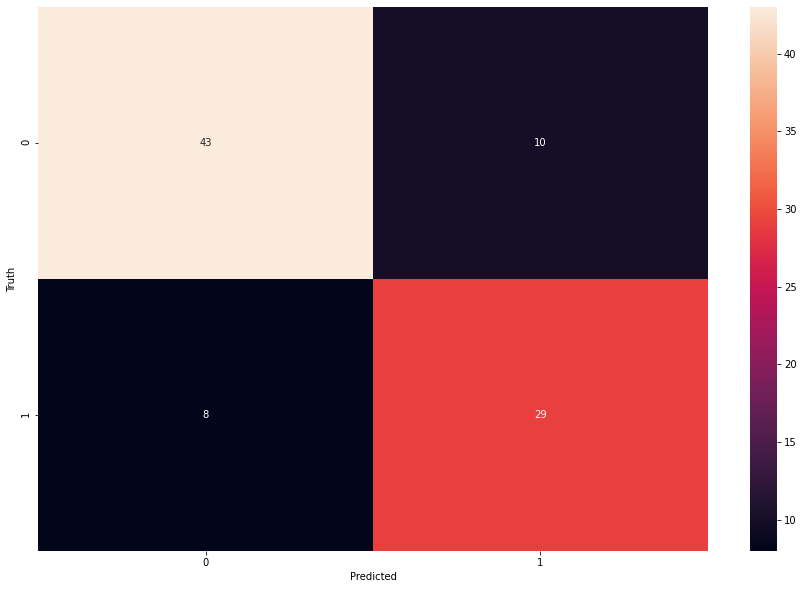

In [32]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize=(15, 10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Predicting example passenger to survive or not using trained model

In [34]:
example_passenger = pd.DataFrame(
{
    'Pclass' :   3,
    'Age'    :   22.,
    'Fare'   :   7.2500,
    'Sex_n'  :   'male'     # male / female
},
index=[0])

example_passenger_to_predict = example_passenger.copy()

if example_passenger.loc[0, 'Sex_n'] == 'male': example_passenger_to_predict['Sex_n'] = 1
elif example_passenger.loc[0, 'Sex_n'] == 'female': example_passenger_to_predict['Sex_n'] = 0

if model.predict(example_passenger_to_predict): survived = 'survive'
else: survived = 'not survive' 

print(f'Example passenger\n {example_passenger}\n   will   {survived}')

Example passenger
    Pclass   Age  Fare Sex_n
0       3  22.0  7.25  male
   will   not survive
